# Exploratory Notebook

Dataset: Consists of information on the roles posted.
Student: Matthew CS Wong.

Objective of the project is to produce a model which can give the likelihood that a certain amount of shifts are available given role, location and date/time of shifts.

Process of Notebook: Cleansing, Defining Questions, Visualisation.

### 1. Importing Python packages

In [1]:
import pandas as pd #provides high-performance, easy-to-use data structures and data analysis tools
import numpy as np #fundamental package for scientific computing with Python
import seaborn as sns #Python data visualisation library based on matplotlib
import matplotlib.pyplot as plt #2D plotting library

from datetime import datetime

### 2. Loading Data

In [2]:
jobs_df = pd.read_excel('data (40)_updatedV1.xlsx') #contains all the entries
roles_df = pd.read_excel('data (39)_updatedV1.xlsx') #contains the description of the roles
print(jobs_df.shape)
print(roles_df.shape)

(134642, 26)
(28, 10)


In [3]:
jobs_df.head()

,area_id,bookable_individually,break_duration,created_at,deleted_at,employer_id,end_time,filled_spots,health_and_safety_information,id,...,purchase_order_number,rated,role_id,stage,start_time,timesheet_approval_needed,total_spots,v1_job_id,v1_shift_group_ids,workers_required
0,NaN,False,0,2015-10-22 14:07:14.213,NaT,39,2015-10-26,0,NaN,6,...,NaN,True,30,3.0,2015-10-25 17:00:00,False,1,6.0,{10},1
1,NaN,False,0,2015-10-22 14:08:48.880,NaT,39,2015-10-26,0,NaN,7,...,NaN,True,30,3.0,2015-10-25 17:00:00,False,1,7.0,{11},1
2,NaN,False,0,2015-10-22 14:10:16.920,NaT,39,2015-10-26,1,NaN,8,...,NaN,True,30,3.0,2015-10-25 17:00:00,False,1,8.0,{12},1
3,NaN,False,0,2015-10-27 10:02:46.500,NaT,39,2015-11-01,1,NaN,12,...,NaN,True,30,3.0,2015-10-31 18:30:00,False,1,12.0,{17},1
4,NaN,False,0,2015-10-27 10:05:35.850,NaT,39,2015-11-01,1,NaN,13,...,NaN,True,30,3.0,2015-10-31 18:30:00,False,1,13.0,{18},1


In [4]:
jobs_df.info() #shows the columns, number of entries and the type of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134642 entries, 0 to 134641
Data columns (total 26 columns):
area_id                          12674 non-null float64
bookable_individually            134642 non-null bool
break_duration                   134642 non-null int64
created_at                       134642 non-null datetime64[ns]
deleted_at                       24771 non-null datetime64[ns]
employer_id                      134642 non-null int64
end_time                         133868 non-null datetime64[ns]
filled_spots                     134642 non-null int64
health_and_safety_information    514 non-null object
id                               134642 non-null int64
industry_id                      134642 non-null int64
listing_id                       134642 non-null int64
pay_rate                         131986 non-null float64
pay_rate_max                     134642 non-null float64
pay_rate_min                     134642 non-null float64
platform_id                      1

In [5]:
jobs_df.describe() #descriptive statistics

,area_id,break_duration,employer_id,filled_spots,id,industry_id,listing_id,pay_rate,pay_rate_max,pay_rate_min,platform_id,role_id,stage,total_spots,v1_job_id,workers_required
count,12674.000000,134642.000000,134642.000000,134642.000000,134642.000000,134642.000000,134642.000000,131986.000000,134642.000000,134642.000000,134642.000000,134642.000000,110071.000000,134642.000000,13883.000000,134642.000000
mean,21457.294619,263.674596,21008.314122,2.025675,74511.145898,1.047118,59626.083094,9.871219,29.567276,9.420776,1.424236,34.383305,2.935106,2.345695,8917.884175,2.162015
std,7520.317740,652.910400,10981.873621,4.290620,42885.514755,0.212206,35339.583907,1.629978,2.701567,1.381838,3.108990,19.343736,0.369765,12.209050,5037.243638,5.186482
min,3681.000000,-3600.000000,39.000000,0.000000,6.000000,1.000000,1.000000,0.000000,9.030000,0.000000,1.000000,28.000000,0.000000,0.000000,6.000000,1.000000
25%,20514.000000,0.000000,10459.000000,1.000000,38102.250000,1.000000,29258.250000,9.000000,30.000000,9.000000,1.000000,29.000000,3.000000,1.000000,4611.500000,1.000000
50%,23212.000000,0.000000,28222.000000,1.000000,72835.500000,1.000000,58606.500000,9.000000,30.000000,9.000000,1.000000,30.000000,3.000000,1.000000,9022.000000,1.000000
75%,26460.000000,0.000000,29708.000000,2.000000,110496.250000,1.000000,88523.500000,10.000000,30.000000,9.150000,1.000000,32.000000,3.000000,2.000000,13159.500000,2.000000
max,31137.000000,7200.000000,32443.000000,684.000000,153497.000000,4.000000,125435.000000,30.000000,30.000000,22.500000,28.000000,157.000000,3.000000,3600.000000,17589.000000,1000.000000


In [6]:
roles_df.head()

,code,created_at,deleted_at,id,industry_id,minimum_hours,restrict_verification,subindustry,title,updated_at
0,kitchen-porter,2017-06-18 19:15:57.267,NaN,28,1,4,False,Back of House,Kitchen porter,2019-05-03 12:53:54.997
1,general-staff,2017-06-18 19:15:57.267,NaN,29,1,4,False,Front of House,General staff,2019-05-03 12:53:54.623
2,waiting-staff,2017-06-18 19:15:57.267,NaN,30,1,4,False,Front of House,Waiting staff,2019-05-03 12:53:56.183
3,bar-staff,2017-06-18 19:15:57.267,NaN,31,1,4,False,Front of House,Bartender,2019-05-03 12:53:53.627
4,bar-back,2017-06-18 19:15:57.267,NaN,32,1,4,False,Front of House,Bar back,2019-05-03 12:53:53.380


In [7]:
roles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
code                     28 non-null object
created_at               28 non-null datetime64[ns]
deleted_at               0 non-null float64
id                       28 non-null int64
industry_id              28 non-null int64
minimum_hours            28 non-null int64
restrict_verification    28 non-null bool
subindustry              17 non-null object
title                    28 non-null object
updated_at               28 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 2.1+ KB


In [8]:
roles_df.describe() #descriptive statistics

,deleted_at,id,industry_id,minimum_hours
count,0.0,28.000000,28.000000,28.000000
mean,NaN,76.964286,1.607143,4.357143
std,NaN,55.098889,0.956045,0.780042
min,NaN,28.000000,1.000000,4.000000
25%,NaN,34.750000,1.000000,4.000000
50%,NaN,44.500000,1.000000,4.000000
75%,NaN,150.250000,2.000000,4.000000
max,NaN,158.000000,4.000000,6.000000


### 3. Data Cleaning
The process of analysing, identifying and correcting messy, raw data.

Matt 05/07/2019: Remember to treat the NaT/Null values

In [9]:
# Remove unnecessary columns

# del_col_list = ['','','']

# jobs_df = jobs_df.drop(del_col_list, axis=1)
# jobs_df.head()

In [10]:
# Removing the duplicacy in the rows

print(jobs_df.shape)
jobs_df = jobs_df.drop_duplicates(keep='last')
print(jobs_df.shape)

(134642, 26)
(134642, 26)


Matt: There were no duplicated cells within the jobs dataframe.

In [11]:
# Creating Date and Time columns

## Changing start_time column to DateTime column
jobs_df.start_time = pd.to_datetime(jobs_df['start_time'])

# Dropping rows with empyty start_time
jobs_df = jobs_df.dropna(subset = ['start_time'])

## Extract the date and time for each row
jobs_df['Date'] = jobs_df['start_time'].dt.date
jobs_df['Day'] = jobs_df['start_time'].dt.strftime("%A")
jobs_df['Month'] = jobs_df['start_time'].dt.strftime("%B")
jobs_df['Year'] = jobs_df['start_time'].dt.strftime("%Y")
jobs_df['Time'] = jobs_df['start_time'].dt.time
jobs_df['Hour'] = jobs_df['start_time'].dt.strftime("%H")
jobs_df['Minute'] = jobs_df['start_time'].dt.minute
jobs_df['Day of Year'] = jobs_df['start_time'].dt.strftime("%j")
jobs_df['Week of Year'] = jobs_df['start_time'].dt.strftime("%W")

In [12]:
jobs_df.head()

,area_id,bookable_individually,break_duration,created_at,deleted_at,employer_id,end_time,filled_spots,health_and_safety_information,id,...,workers_required,Date,Day,Month,Year,Time,Hour,Minute,Day of Year,Week of Year
0,NaN,False,0,2015-10-22 14:07:14.213,NaT,39,2015-10-26,0,NaN,6,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
1,NaN,False,0,2015-10-22 14:08:48.880,NaT,39,2015-10-26,0,NaN,7,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
2,NaN,False,0,2015-10-22 14:10:16.920,NaT,39,2015-10-26,1,NaN,8,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
3,NaN,False,0,2015-10-27 10:02:46.500,NaT,39,2015-11-01,1,NaN,12,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
4,NaN,False,0,2015-10-27 10:05:35.850,NaT,39,2015-11-01,1,NaN,13,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43


In [13]:
# alternatively, before converting the numerical values to categorical values,
# we can assgin the role name to each entry based on roles_df and it will be considered categorical already.

In [14]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133868 entries, 0 to 134641
Data columns (total 35 columns):
area_id                          12573 non-null float64
bookable_individually            133868 non-null bool
break_duration                   133868 non-null int64
created_at                       133868 non-null datetime64[ns]
deleted_at                       24142 non-null datetime64[ns]
employer_id                      133868 non-null int64
end_time                         133868 non-null datetime64[ns]
filled_spots                     133868 non-null int64
health_and_safety_information    514 non-null object
id                               133868 non-null int64
industry_id                      133868 non-null int64
listing_id                       133868 non-null int64
pay_rate                         131266 non-null float64
pay_rate_max                     133868 non-null float64
pay_rate_min                     133868 non-null float64
platform_id                      1

In [15]:
# Converting columns to Categorical
## For jobs_df:
jobs_df['role_id'] = jobs_df['role_id'].astype('category',copy=False)
print("1.", jobs_df.role_id.dtypes)
#jobs_df['area_id'] = jobs_df['area_id'].astype(int)
jobs_df['area_id'] = jobs_df['area_id'].astype('category',copy=False)
print("2.", jobs_df.area_id.dtypes)
jobs_df['employer_id'] = jobs_df['employer_id'].astype('category',copy=False)
print("3.", jobs_df.employer_id.dtypes)
jobs_df['industry_id'] = jobs_df['industry_id'].astype('category',copy=False)
print("4.", jobs_df.industry_id.dtypes)
jobs_df['Day'] = jobs_df['Day'].astype('category',copy=False)
print("5.", jobs_df.Day.dtypes)
jobs_df['Month'] = jobs_df['Month'].astype('category',copy=False)
print("6.", jobs_df.Month.dtypes)
jobs_df['Year'] = jobs_df['Year'].astype('category',copy=False)
print("7.", jobs_df.Year.dtypes)
jobs_df['Hour'] = jobs_df['Hour'].astype('category',copy=False)
print("8.", jobs_df.Hour.dtypes)
jobs_df['Day of Year'] = jobs_df['Day of Year'].astype('category',copy=False)
print("5.", jobs_df['Day of Year'].dtypes)
jobs_df['Week of Year'] = jobs_df['Week of Year'].astype('category',copy=False)
print("6.", jobs_df['Week of Year'].dtypes)

## renaming column name for roles_df
roles_df = roles_df.rename(index=str, columns={"id": "role_id"})
## For roles_df
roles_df['role_id'] = roles_df['role_id'].astype('category',copy=False)
print("11.", roles_df.role_id.dtypes)
roles_df['code'] = roles_df['code'].astype('category',copy=False)
print("12.", roles_df.code.dtypes)
roles_df['industry_id'] = roles_df['industry_id'].astype('category',copy=False)
print("13.", roles_df.industry_id.dtypes)
roles_df['subindustry'] = roles_df['subindustry'].astype('category',copy=False)
print("14.", roles_df.subindustry.dtypes)
roles_df['title'] = roles_df['title'].astype('category',copy=False)
print("15.", roles_df.title.dtypes)

('1.', CategoricalDtype(categories=[ 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,
                   41,  44,  45,  46,  47,  48,  99, 149, 150, 151, 152, 153,
                  155, 156, 157],
                 ordered=False))
('2.', CategoricalDtype(categories=[ 3681.0,  3682.0,  3683.0,  3689.0,  3690.0,  3692.0,
                   3693.0,  3695.0,  3697.0,  3698.0,
                  ...
                  30901.0, 30958.0, 31002.0, 31006.0, 31045.0, 31075.0,
                  31082.0, 31117.0, 31136.0, 31137.0],
                 ordered=False))
('3.', CategoricalDtype(categories=[   39,    45,    95,    97,   100,   104,   147,   157,
                    160,   176,
                  ...
                  32427, 32429, 32430, 32432, 32433, 32434, 32436, 32437,
                  32438, 32443],
                 ordered=False))
('4.', CategoricalDtype(categories=[1, 2, 4], ordered=False))
('5.', CategoricalDtype(categories=[u'Friday', u'Monday', u'Saturday', u'Sunday', u'T

In [16]:
# Creating dataframe that consists of just the role_id, arae_id, date, 
# time and total_spots columns.

df1 = jobs_df[['role_id','area_id','Day','Month','Year','Hour','Day of Year','Week of Year','total_spots']].copy()
print(df1.head())
print(df1.shape)

  role_id area_id       Day    Month  Year Hour Day of Year Week of Year  \
0      30     NaN    Sunday  October  2015   17         298           42   
1      30     NaN    Sunday  October  2015   17         298           42   
2      30     NaN    Sunday  October  2015   17         298           42   
3      30     NaN  Saturday  October  2015   18         304           43   
4      30     NaN  Saturday  October  2015   18         304           43   

   total_spots  
0            1  
1            1  
2            1  
3            1  
4            1  
(133868, 9)


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133868 entries, 0 to 134641
Data columns (total 9 columns):
role_id         133868 non-null category
area_id         12573 non-null category
Day             133868 non-null category
Month           133868 non-null category
Year            133868 non-null category
Hour            133868 non-null category
Day of Year     133868 non-null category
Week of Year    133868 non-null category
total_spots     133868 non-null int64
dtypes: category(8), int64(1)
memory usage: 3.4 MB


In [18]:
df2 = jobs_df[['role_id','area_id','Day','Month','Year','Hour','Day of Year','Week of Year','workers_required']].copy()
df2
print(df1.head())
print(df1.shape)

  role_id area_id       Day    Month  Year Hour Day of Year Week of Year  \
0      30     NaN    Sunday  October  2015   17         298           42   
1      30     NaN    Sunday  October  2015   17         298           42   
2      30     NaN    Sunday  October  2015   17         298           42   
3      30     NaN  Saturday  October  2015   18         304           43   
4      30     NaN  Saturday  October  2015   18         304           43   

   total_spots  
0            1  
1            1  
2            1  
3            1  
4            1  
(133868, 9)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133868 entries, 0 to 134641
Data columns (total 9 columns):
role_id             133868 non-null category
area_id             12573 non-null category
Day                 133868 non-null category
Month               133868 non-null category
Year                133868 non-null category
Hour                133868 non-null category
Day of Year         133868 non-null category
Week of Year        133868 non-null category
workers_required    133868 non-null int64
dtypes: category(8), int64(1)
memory usage: 3.4 MB


### 4. Defining Questions
The main goal is to identify and create relationships which can help build a hypothesis. We define questions which can help us build some relationships to look at.

Preliminary Set of Questions:
1. Which roles have the most number of shifts?
2. Which location has the most number of shifts?
3. Which date or time has the most number of shifts?

In [20]:
# Question 1: Which roles have the most number of shifts?
# Accumulating total_spots based on roled_id

#df1ques1 = df1.groupby(['role_id']).sum() is an alternative method.
df1ques1 = df1.groupby('role_id')['total_spots'].sum()
df2ques1 = df2.groupby('role_id')['workers_required'].sum()
df1ques1.head()
df2ques1.head()

role_id
28     18386
29     44094
30    132566
31     37022
32      8320
Name: workers_required, dtype: int64

In [21]:
# Question 2: Which location has the most number of shifts?
# Accumulating total_spots based on area_id

#dfques2 = df1.groupby(['area_id']).sum()
df1ques2 = df1.groupby('area_id')['total_spots'].sum()
df2ques2 = df2.groupby('area_id')['workers_required'].sum()
print(df1ques2.head())
print(df2ques2.head())

area_id
3681.0      0
3682.0     48
3683.0     61
3689.0    102
3690.0      1
Name: total_spots, dtype: int64
area_id
3681.0     1
3682.0    53
3683.0    68
3689.0    90
3690.0     1
Name: workers_required, dtype: int64


In [22]:
df1ques2a = df1ques2.sort_values()
print(df1ques2a)

area_id
3681.0        0
25158.0       0
25157.0       0
25128.0       0
24979.0       0
24965.0       0
24910.0       0
24670.0       0
24614.0       0
24581.0       0
24579.0       0
24554.0       0
24548.0       0
24534.0       0
24415.0       0
24348.0       0
25332.0       0
24346.0       0
25420.0       0
25621.0       0
26329.0       0
26241.0       0
26234.0       0
26084.0       0
26083.0       0
26072.0       0
25866.0       0
25846.0       0
25839.0       0
25792.0       0
           ... 
20165.0     208
23464.0     224
21284.0     225
23654.0     229
22657.0     235
23655.0     239
23656.0     242
27609.0     243
24990.0     250
21368.0     273
19648.0     294
23212.0     296
21474.0     307
24860.0     310
20183.0     322
23621.0     349
26767.0     361
26194.0     363
20399.0     392
21492.0     410
28968.0     445
3720.0      460
26758.0     556
20514.0     594
22860.0     607
24992.0     660
3730.0      670
23647.0     717
3774.0      881
23978.0    1233
Name: total_spot

In [23]:
# Question 3: Which date has the most number of shifts?
# Accumulating total_spots based on Date

df1ques3a = df1.groupby(['Day']).sum()
df2ques3a = df2.groupby(['Day']).sum()

#df1ques3a = df1.groupby('Day')['total_spots'].sum()

df1ques3b = df1.groupby(['Month']).sum()
df2ques3b = df2.groupby(['Month']).sum()

df1ques3c = df1.groupby(['Year']).sum()
df2ques3c = df2.groupby(['Year']).sum()

df1ques3d = df1.groupby(['Hour']).sum()
df2ques3d = df2.groupby(['Hour']).sum()

df1ques3e = df1.groupby(['Day of Year']).sum()
df2ques3e = df2.groupby(['Day of Year']).sum()

df1ques3f = df1.groupby(['Week of Year']).sum()
df2ques3f = df2.groupby(['Week of Year']).sum()

In [24]:
#reindexing the output ques3a and ques3b

df1ques3a = df1ques3a.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df2ques3a = df2ques3a.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

df1ques3b = df1ques3b.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                               'August', 'September', 'October', 'November', 'December'])
df2ques3b = df2ques3b.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                               'August', 'September', 'October', 'November', 'December'])

print(df1ques3a.head())
print(df2ques3a.head())
print(df1ques3b.head())
print(df2ques3b.head())

           total_spots
Day                   
Monday           63143
Tuesday          39500
Wednesday        44116
Thursday         48178
Friday           45984
           workers_required
Day                        
Monday                29913
Tuesday               34000
Wednesday             39584
Thursday              51769
Friday                47137
          total_spots
Month                
January         15153
February        16953
March           22256
April           20282
May             32285
          workers_required
Month                     
January              13394
February             13898
March                19885
April                19386
May                  29343


### 5. Data Visualisation

In [25]:
dfques1 = pd.concat([df1ques1,df2ques1],axis = 1 )
print(dfques1.head())

         total_spots  workers_required
role_id                               
28             24684             18386
29             47145             44094
30            126370            132566
31             33747             37022
32              9678              8320


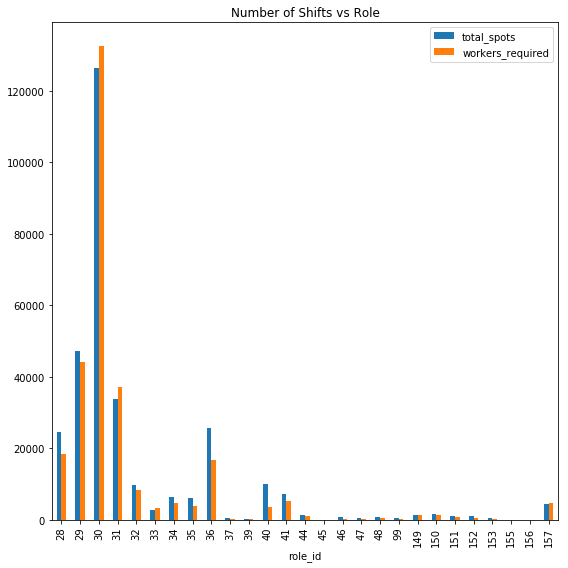

In [26]:
dfques1.plot.bar(title='Number of Shifts vs Role', figsize=(8,8))
plt.tight_layout()
#df1ques1.set_ylabel('Total Spots')
plt.savefig('Number of Shifts vs Role.pdf', dpi=150)
plt.show()

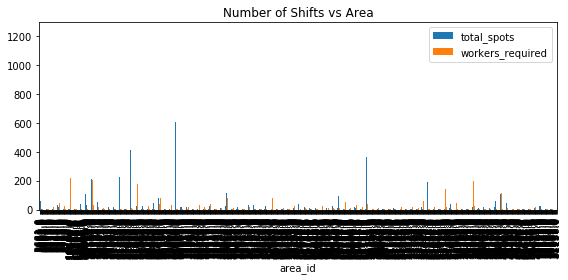

In [27]:
dfques2 = pd.concat([df1ques2,df2ques2],axis = 1 )
dfques2.plot.bar(title='Number of Shifts vs Area', figsize = (8,4))
plt.tight_layout()
plt.savefig('Number of Shifts vs Area.pdf', dpi=150)
plt.show()

In [28]:
dfques2sort = dfques2.sort_values(by=['total_spots', 'workers_required'])

In [29]:
dfques2sort.head()

,total_spots,workers_required
area_id,,
3681.0,0,1
3715.0,0,1
19794.0,0,1
19948.0,0,1
19982.0,0,1


In [30]:
dfques2sort.tail()

,total_spots,workers_required
area_id,,
24992.0,660,81
3730.0,670,559
23647.0,717,376
3774.0,881,854
23978.0,1233,153


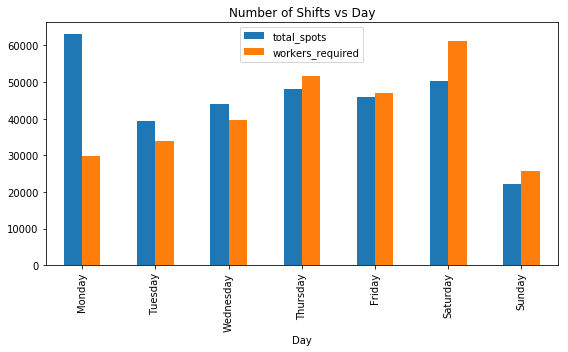

In [31]:
dfques3a = pd.concat([df1ques3a,df2ques3a],axis = 1 )
dfques3a.plot.bar(title='Number of Shifts vs Day', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Day.pdf', dpi=150)
plt.show()

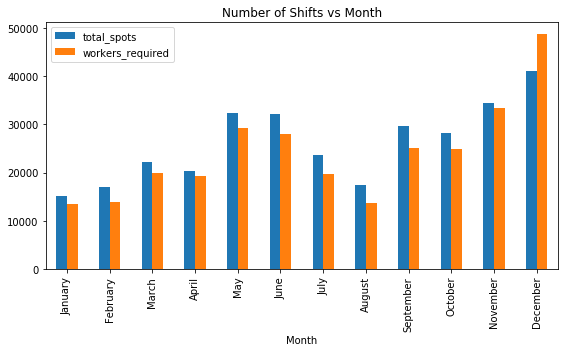

In [32]:
dfques3b = pd.concat([df1ques3b,df2ques3b],axis = 1 )
dfques3b.plot.bar(title='Number of Shifts vs Month', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Month.pdf', dpi=150)
plt.show()

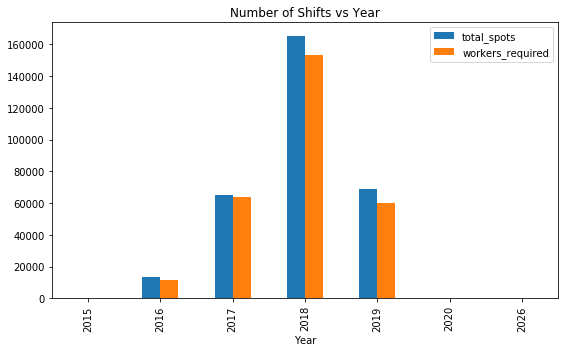

In [33]:
dfques3c = pd.concat([df1ques3c,df2ques3c],axis = 1 )
dfques3c.plot.bar(title='Number of Shifts vs Year', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Year.pdf', dpi=150)
plt.show()

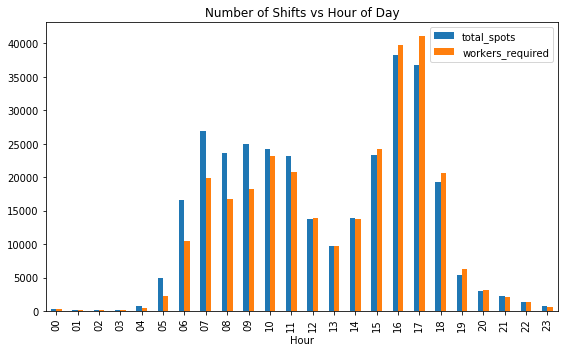

In [34]:
dfques3d = pd.concat([df1ques3d,df2ques3d],axis = 1 )
dfques3d.plot.bar(title='Number of Shifts vs Hour of Day', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Hour of day.pdf', dpi=150)
plt.show()

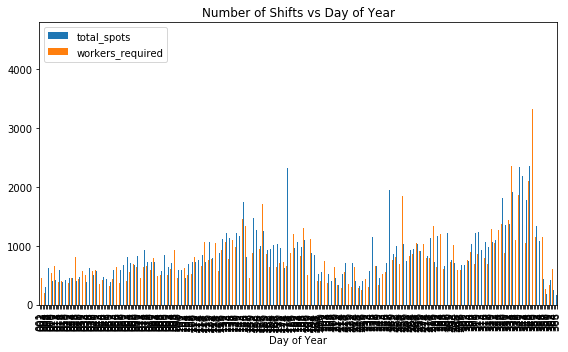

In [35]:
dfques3e = pd.concat([df1ques3e,df2ques3e],axis = 1 )
dfques3e.plot.bar(title='Number of Shifts vs Day of Year', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Day of Year.pdf', dpi=150)
plt.show()

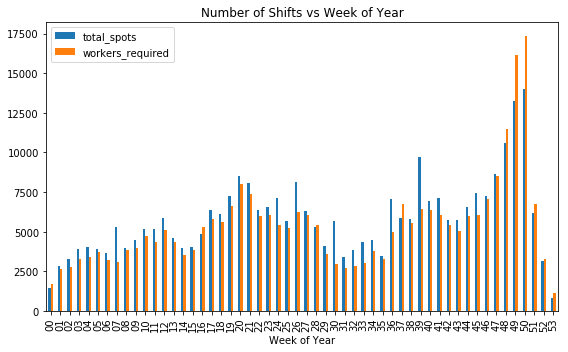

In [36]:
dfques3f = pd.concat([df1ques3f,df2ques3f],axis = 1 )
dfques3f.plot.bar(title='Number of Shifts vs Week of Year', figsize=(8,5))
plt.tight_layout()
plt.savefig('Number of Shifts vs Week of Year.pdf', dpi=150)
plt.show()

### 6. Exporting required DataFrames

In [37]:
df1.to_csv(r'df1.csv') #df1 is based on total_spots output

In [39]:
jobs_df.to_csv('jobs_df.csv')

UnicodeEncodeError: 'ascii' codec can't encode character u'\u2019' in position 4: ordinal not in range(128)

In [40]:
df2.to_csv(r'df2.csv') #df2 is based on required_workers